In [362]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier

In [363]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\\'

In [364]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [365]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

# Arousal

In [366]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [368]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [369]:
classifier = MLPClassifier(hidden_layer_sizes=(80, 3), random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [370]:
y_pred_train = classifier.predict(X_train)

In [371]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [372]:
confusion_mtrx

array([[  0,   1,   0,   0,   3,   2,   0],
       [  0,  15,  12,   0,   7,   3,   0],
       [  0,   7,  45,   3,  10,   2,   0],
       [  0,   2,   0,  81,  22,   3,   0],
       [  0,   0,   0,  10, 197,   4,   0],
       [  0,   2,  10,   6,  33, 106,   0],
       [  0,   0,   0,   4,  16,  32,   0]], dtype=int64)

In [373]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [374]:
print(accuracy, mae, rmse)

0.6959247648902821 0.4843260188087774 1.0297805642633229


In [375]:
y_pred = classifier.predict(X_test)

In [376]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [377]:
confusion_mtrx

array([[ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  1,  0,  3,  6,  0],
       [ 0,  1,  3,  5,  8,  3,  0],
       [ 0,  1,  4,  9, 21, 11,  0],
       [ 0,  4,  3,  6, 48, 13,  0],
       [ 0,  0,  3, 10, 18, 13,  0],
       [ 0,  1,  1,  2,  5,  7,  0]], dtype=int64)

In [378]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [379]:
print(accuracy, mae, rmse)

0.3474178403755869 1.1220657276995305 2.539906103286385


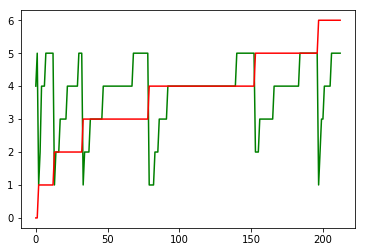

In [380]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

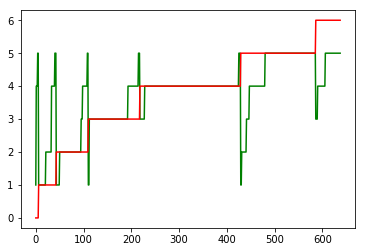

In [381]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [382]:
np.arange(10, 15)

array([10, 11, 12, 13, 14])